In [12]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ML2_lib import loss
from ML2_lib import DC_SGD

In [13]:
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_normal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="normal",loss_type=son,c=c,fixed_lr=False)


  0%|          | 0/10 [00:00<?, ?it/s]

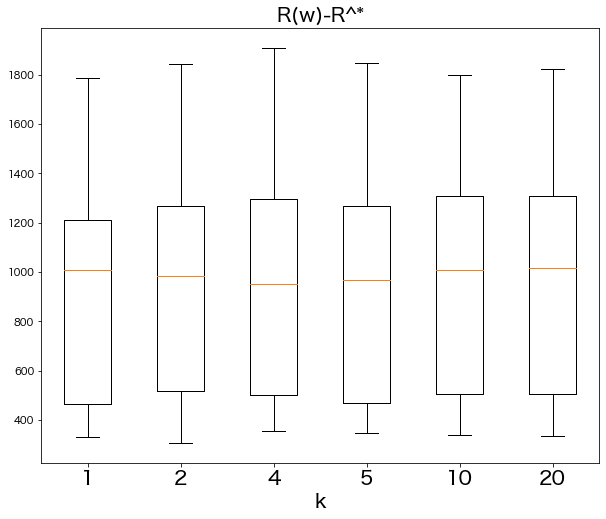

In [14]:
_, result_loss_gauss = exp_normal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [15]:
df = pd.DataFrame(result_loss_gauss[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,914.052880,946.383364,955.773170,950.442320,964.763651,968.144269
std,474.998415,506.337716,515.406924,504.250777,503.112039,508.289665
min,328.585916,305.964004,355.778088,346.370940,338.606460,333.990803
25%,463.658531,517.442286,499.742143,469.252274,503.056925,504.713227
50%,1007.335712,983.427393,951.680686,965.554936,1009.271476,1014.804526
75%,1210.089167,1269.102413,1295.720116,1268.279998,1306.331889,1308.413848
max,1789.088701,1842.596469,1910.142704,1847.224599,1798.854804,1824.912298


In [16]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,1210.089167,1269.102413,1295.720116,1268.279998,1306.331889,1308.413848
0.80,1267.991318,1325.219398,1331.884750,1310.526155,1341.317254,1341.082696
0.90,1346.808951,1449.349835,1437.193248,1463.171591,1480.676259,1463.887499
0.95,1567.948826,1645.973152,1673.667976,1655.198095,1639.765532,1644.399899
0.99,1744.860726,1803.271806,1862.847758,1808.819298,1767.036950,1788.809818


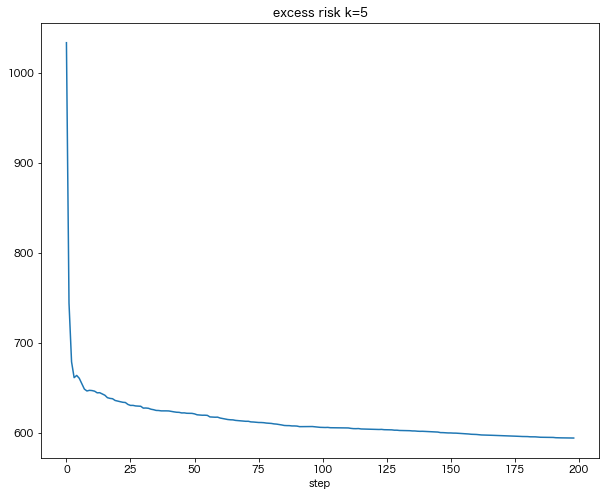

In [17]:
k = 5
_,loss_transition = exp_normal.transition(k=5,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

In [18]:
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_lognormal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="lognormal",loss_type=son,c=c,fixed_lr=False)


  0%|          | 0/10 [00:00<?, ?it/s]

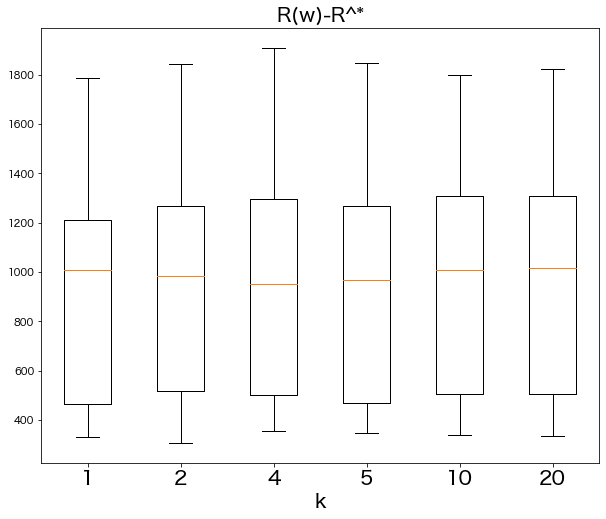

In [19]:
_, result_loss_lognormal = exp_lognormal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [20]:
df = pd.DataFrame(result_loss_lognormal[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,986.674493,1054.035391,1455.681684,1945.840637,1473.541982,3379.366144
std,408.145797,430.578306,988.289490,2788.790513,1142.806803,5545.418379
min,414.223252,393.026760,330.465734,522.135801,789.794782,209.283436
25%,718.321955,851.769930,1109.091456,613.765314,868.587752,731.052293
50%,806.356196,1011.731933,1303.146055,1162.421223,1020.731742,1372.955794
75%,1408.788093,1189.875634,1426.614167,1534.921732,1238.252773,2023.522224
max,1556.259499,1773.896265,4093.487226,9752.923413,4398.256797,18236.637443


In [21]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,1408.788093,1189.875634,1426.614167,1534.921732,1238.252773,2023.522224
0.80,1450.745709,1290.272684,1443.098865,1657.300955,1508.062032,3012.702222
0.90,1465.977478,1674.037527,1759.706717,2800.072975,2684.182351,7885.771017
0.95,1511.118488,1723.966896,2926.596972,6276.498194,3541.219574,13061.204230
0.99,1547.231297,1763.910391,3860.109175,9057.638370,4226.849353,17201.550801


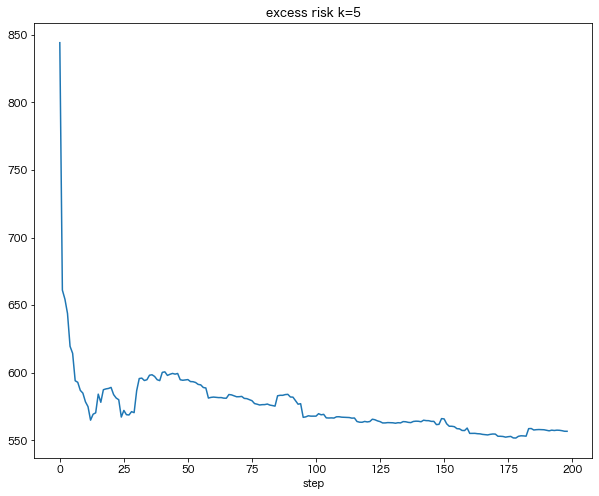

In [22]:
k = 5
_,loss_transition = exp_lognormal.transition(k=k,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

In [23]:
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_normal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="normal",loss_type=son,c=c,fixed_lr=True)


  0%|          | 0/10 [00:00<?, ?it/s]

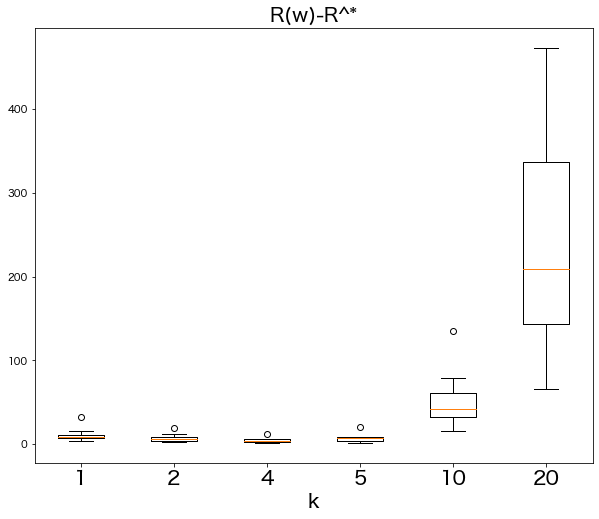

In [24]:
_, result_loss_gauss = exp_normal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [25]:
df = pd.DataFrame(result_loss_gauss[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,11.006756,7.395379,4.706367,7.165788,52.747456,238.122416
std,8.400305,4.994286,2.919362,5.211494,34.280166,135.415399
min,3.828781,2.365269,1.501803,1.202902,16.122860,65.292346
25%,7.187242,3.989678,3.015087,4.029429,32.620199,143.475082
50%,8.506249,5.922759,4.159812,6.684794,41.385379,209.474024
75%,11.181574,8.721786,5.607083,7.815980,61.234256,336.832291
max,32.859670,18.947242,11.713597,20.275912,135.285465,473.195662


In [26]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,11.181574,8.721786,5.607083,7.815980,61.234256,336.832291
0.80,12.136373,9.722515,5.933042,8.076180,66.692954,375.380084
0.90,17.108844,12.793290,6.957266,9.958954,84.576321,409.193942
0.95,24.984257,15.870266,9.335431,15.117433,109.930893,441.194802
0.99,31.284587,18.331847,11.237964,19.244216,130.214551,466.795490


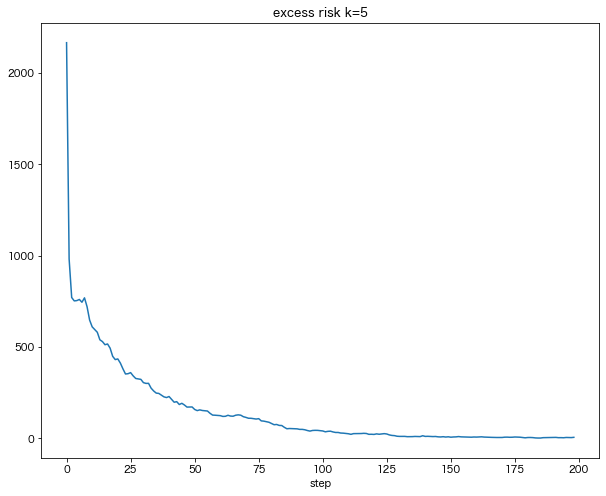

In [27]:
k = 5
_,loss_transition = exp_normal.transition(k=5,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

In [28]:
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_lognormal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="lognormal",loss_type=son,c=c,fixed_lr=True)


  0%|          | 0/10 [00:00<?, ?it/s]

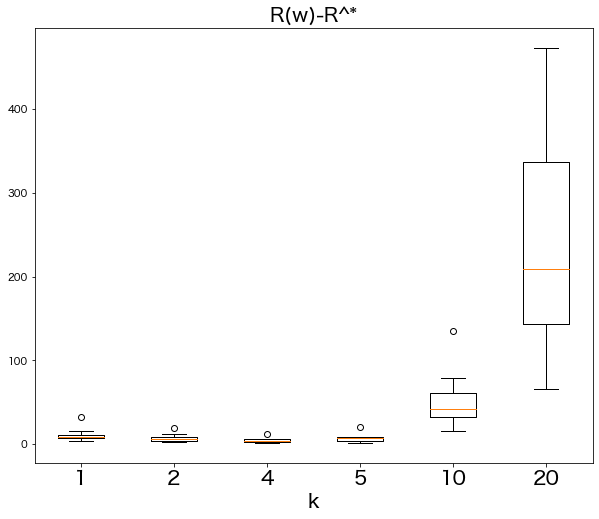

In [29]:
_, result_loss_lognormal = exp_lognormal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [30]:
df = pd.DataFrame(result_loss_lognormal[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.804959e+05,9390.424229,14287.337030,11487.589645,18382.046481,41923.047035
std,1.496667e+06,13505.313238,21531.993340,13535.280028,23295.978774,55944.479013
min,5.337609e+02,874.978502,1674.631255,790.393278,2670.606507,3642.393868
25%,3.273647e+03,2046.270893,2034.522852,3560.886142,5125.165446,6079.829393
50%,6.096665e+03,3777.096667,2946.157682,5585.640081,9770.383199,17699.843935
75%,1.285407e+04,5567.940489,14263.419457,15976.044718,21828.631654,42504.874216
max,4.740049e+06,39813.451396,62074.724432,45780.760312,79505.369863,170943.778991


In [31]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,1.285407e+04,5567.940489,14263.419457,15976.044718,21828.631654,42504.874216
0.80,1.528981e+04,10293.097719,22819.739967,18244.319353,25012.083163,58008.287521
0.90,4.925239e+05,29976.463196,46472.923148,21378.545005,34463.520461,117321.946910
0.95,2.616287e+06,34894.957296,54273.823790,33579.652659,56984.445162,144132.862950
0.99,4.315297e+06,38829.752576,60514.544304,43340.538781,75001.184923,165581.595782


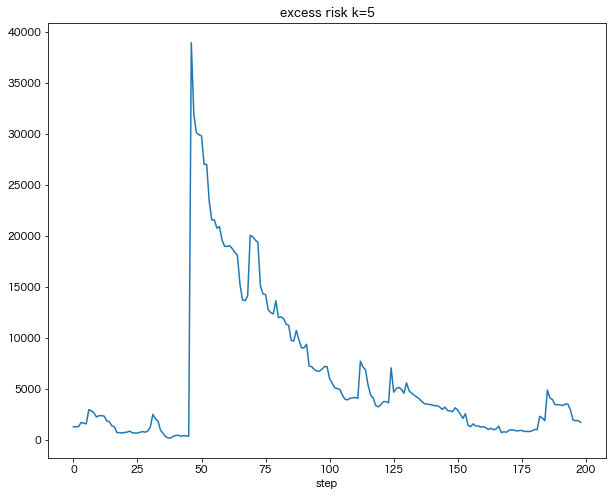

In [32]:
k = 5
_,loss_transition = exp_lognormal.transition(k=k,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()
